In [1]:
# I am beginning by uploading some of the different libraries I will need for the project. I will add more as needed.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
# Here I am uploading and printing the dataframe. It contains census information and has 48,881 rows and 15 columns. 

df1 = pd.read_csv(r"C:\Users\Tevin\Downloads\census_one.txt")
print(df1)

       39          State-gov   77516   Bachelors  13        Never-married  \
0      50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
1      38            Private  215646     HS-grad   9             Divorced   
2      53            Private  234721        11th   7   Married-civ-spouse   
3      28            Private  338409   Bachelors  13   Married-civ-spouse   
4      37            Private  284582     Masters  14   Married-civ-spouse   
...    ..                ...     ...         ...  ..                  ...   
48836  39            Private  215419   Bachelors  13             Divorced   
48837  64                  ?  321403     HS-grad   9              Widowed   
48838  38            Private  374983   Bachelors  13   Married-civ-spouse   
48839  44            Private   83891   Bachelors  13             Divorced   
48840  35       Self-emp-inc  182148   Bachelors  13   Married-civ-spouse   

             Adm-clerical    Not-in-family                White     Male  \

In [3]:
# Below I just wanted a quick and cleaner visual of the data.

df1.head(10)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
# Here I assigned the columns the various names per the project guidelines. Then I took another look to see the changes. 

df1.columns = ['Age', 'Work-class', 'FNLWGT', 'Education', 'Education-num', 'Marital', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country', 'Income-50K']
df1.head()

,Age,Work-class,FNLWGT,Education,Education-num,Marital,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income-50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
# I used the describe code to get a temperature check regarding the int values. 
# Below we can see the standard deviations of each column to get an idea for finding outliers.
# Capital-gain might have a possible outlier. 

df1.describe()

,Age,FNLWGT,Education-num,Capital-gain,Capital-loss,Hours-per-week
count,48841.000000,4.884100e+04,48841.000000,48841.000000,48841.000000,48841.000000
mean,38.643578,1.896664e+05,10.078029,1079.045208,87.504105,40.422391
std,13.710650,1.056039e+05,2.570965,7452.093700,403.008483,12.391571
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781470e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376460e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# The missing values were coming up as question marks in the dataframe. 
# Below I changed the missing values from question marks to show as null or "NaN" values.

df1 = df1.replace({' ?': np.nan})
df1

,Age,Work-class,FNLWGT,Education,Education-num,Marital,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income-50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48837,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48838,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48839,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [7]:
# Checking for nulls with some code to get counts. The null values are shown below. 

df1.isnull().sum()

Age                  0
Work-class        2799
FNLWGT               0
Education            0
Education-num        0
Marital              0
Occupation        2809
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Native-country     857
Income-50K           0
dtype: int64

In [8]:
# I wanted to get a visual of the rows that contained null values and where they were.
# If the nulls in the Work-class column and the Occupation column are in the same rows, then maybe we can assume that these are unemployed people and we can replace the missing values.
# I added a display max row code to confirm the null rows had the same missing values.


df2 = df1.loc[pd.isnull(df1).any(1),:]
df2.head(100)

,Age,Work-class,FNLWGT,Education,Education-num,Marital,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income-50K
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
26,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
60,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,51,NaN,165637,Masters,14,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
1198,50,Private,75472,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,4386,0,40,NaN,<=50K
1207,22,NaN,42004,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
1214,63,NaN,150389,Bachelors,13,Widowed,NaN,Not-in-family,White,Female,0,0,40,United-States,>50K


In [9]:
# I have determined that a resounding majority of the missing values between work class and occupation are in the same rows.@
# The values were missing but they were not random, so I am deciding to impute the values as "unemployed".


df1['Work-class'].fillna('Unemployed', inplace=True)
df1

,Age,Work-class,FNLWGT,Education,Education-num,Marital,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income-50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48837,64,Unemployed,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48838,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48839,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [10]:
# Filling in the nulls for Occupation just as I did above with Work-class.

df1['Occupation'].fillna('Unemployed', inplace=True)
df1

,Age,Work-class,FNLWGT,Education,Education-num,Marital,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income-50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48837,64,Unemployed,321403,HS-grad,9,Widowed,Unemployed,Other-relative,Black,Male,0,0,40,United-States,<=50K
48838,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48839,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [11]:
# Checking for nulls again. #
df1.isnull().sum()

Age                 0
Work-class          0
FNLWGT              0
Education           0
Education-num       0
Marital             0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital-gain        0
Capital-loss        0
Hours-per-week      0
Native-country    857
Income-50K          0
dtype: int64

In [12]:
df1

,Age,Work-class,FNLWGT,Education,Education-num,Marital,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income-50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48837,64,Unemployed,321403,HS-grad,9,Widowed,Unemployed,Other-relative,Black,Male,0,0,40,United-States,<=50K
48838,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48839,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [13]:
# I am going to leave the missing data in Native country. It is less than 1% of the data and I do not believe it will be an issue later on.

In [14]:
# I am changing the values for the Income over 50K column. I will change these to 0s and 1s to wrangle the data a bit easier.
# 0 = >50K 
# 1 = <=50K 

df1['Income-50K'] = df1['Income-50K'].replace([' >50K',' <=50K'], ['0','1'])

In [15]:
df1

,Age,Work-class,FNLWGT,Education,Education-num,Marital,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income-50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,1
48837,64,Unemployed,321403,HS-grad,9,Widowed,Unemployed,Other-relative,Black,Male,0,0,40,United-States,1
48838,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,1
48839,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,1


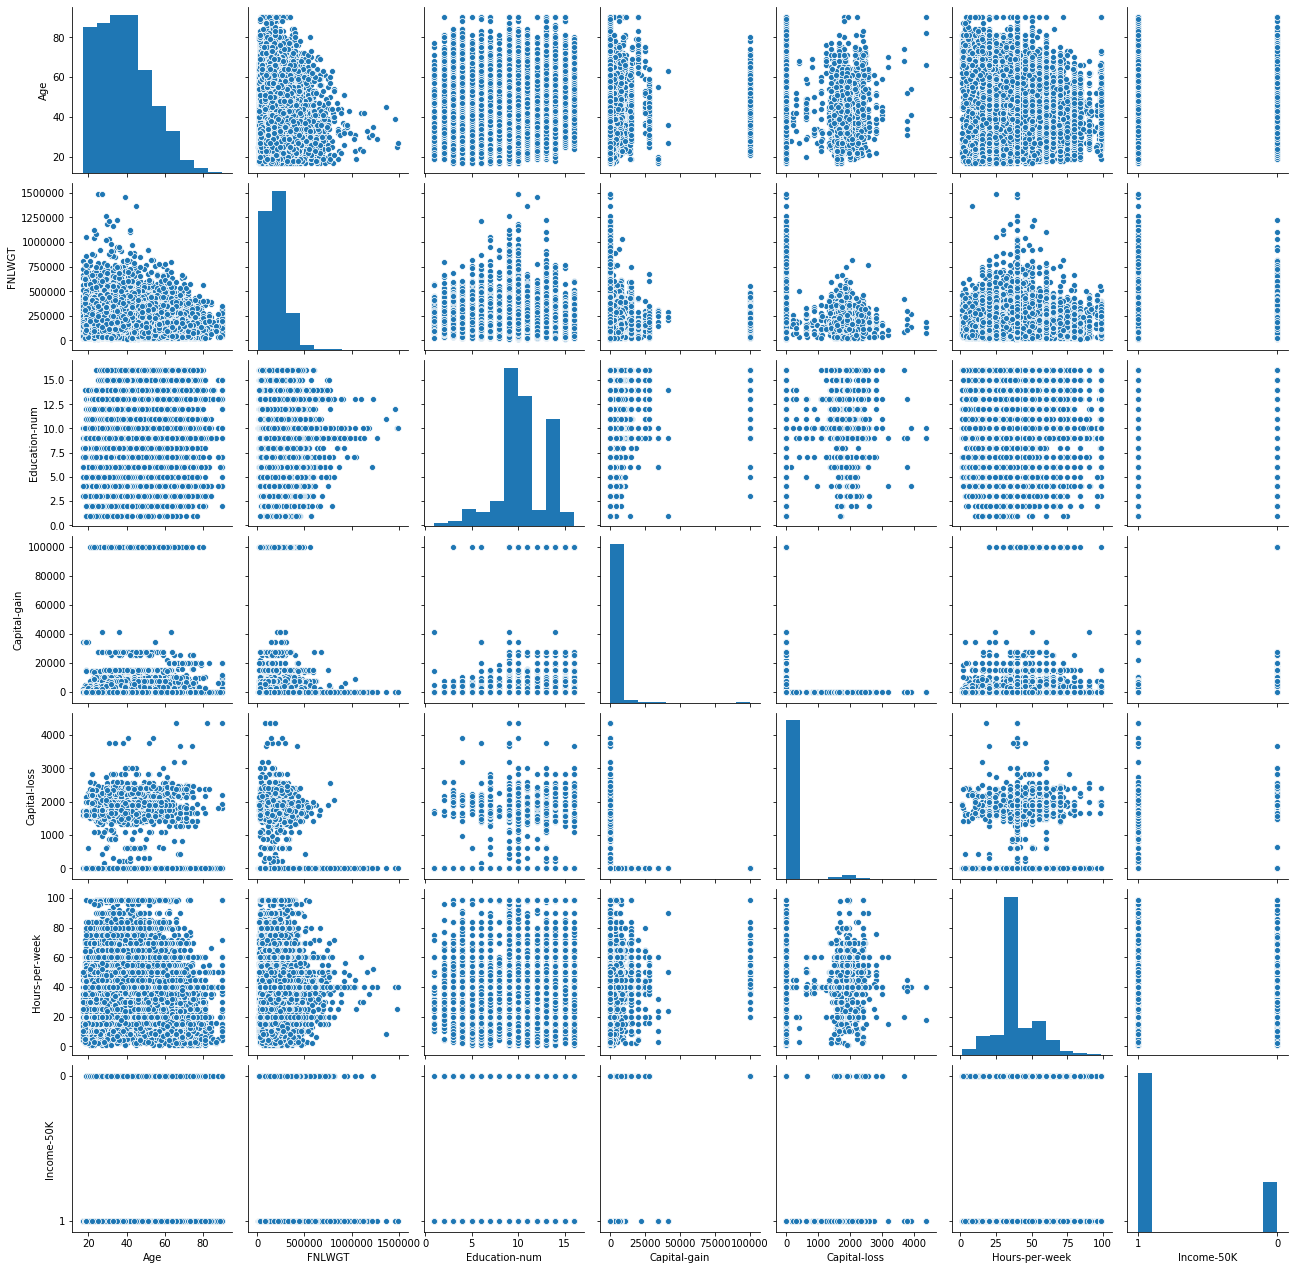

In [16]:
# Here I wanted a scatter matrix of the different integer columns. 
# I can now see where some outliers and possible wrongly entered values might exist. 
# I can see Capital-gain has a lot of values that are way higher than the rest. 
# I will investigate further below. 

sns.pairplot(df1, kind="scatter")
plt.show()

In [17]:
# As I suspected, there are values showing as "99999".
# I saw above that this was the max for the capital gain column. 

In [18]:
# Because it is a few standard deviations from the next highest value, I will assume this was human entry error. 
# Here we see that 244 of the values are showing as "99999" so I will drop them. 

df1['Capital-gain'].value_counts()

0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
2387         1
22040        1
6612         1
1111         1
1639         1
Name: Capital-gain, Length: 123, dtype: int64

In [19]:
# Dropping the rows with the 99999 values in their Capital gain columns. 
# Now we have 48597 rows. 

indexNames = df1[df1['Capital-gain'] == 99999 ].index

df1.drop(indexNames, inplace=True)

df1

,Age,Work-class,FNLWGT,Education,Education-num,Marital,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income-50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,1
48837,64,Unemployed,321403,HS-grad,9,Widowed,Unemployed,Other-relative,Black,Male,0,0,40,United-States,1
48838,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,1
48839,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,1


In [20]:
# Checking value counts to ensure the binary in the income column was successful. 

df1['Income-50K'].value_counts()

1    37154
0    11443
Name: Income-50K, dtype: int64

In [21]:
# Checking for duplicate values.

duplicate_rows_df1 = df1[df1.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df1.shape)

number of duplicate rows:  (52, 15)


In [22]:
# Show which rows are duplicates.

print(duplicate_rows_df1)

       Age         Work-class  FNLWGT      Education  Education-num  \
4880    25            Private  308144      Bachelors             13   
5103    90            Private   52386   Some-college             10   
9170    21            Private  250051   Some-college             10   
11630   20            Private  107658   Some-college             10   
13083   25            Private  195994        1st-4th              2   
15058   21            Private  243368      Preschool              1   
17039   46            Private  173243        HS-grad              9   
18554   30            Private  144593        HS-grad              9   
18697   19            Private   97261        HS-grad              9   
21317   19            Private  138153   Some-college             10   
21489   19            Private  146679   Some-college             10   
21874   49            Private   31267        7th-8th              4   
22299   25            Private  195994        1st-4th              2   
22366 

In [23]:
# Here I am dropping the duplicate rows.

df1 = df1.drop_duplicates()

In [24]:
# Below we see that the dataframe now has 48,545 rows. 

df1

,Age,Work-class,FNLWGT,Education,Education-num,Marital,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income-50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,1
48837,64,Unemployed,321403,HS-grad,9,Widowed,Unemployed,Other-relative,Black,Male,0,0,40,United-States,1
48838,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,1
48839,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,1


In [25]:
# I am deleting the leading white space in the values of each column below. 

df1['Work-class'].str.strip()

0        Self-emp-not-inc
1                 Private
2                 Private
3                 Private
4                 Private
               ...       
48836             Private
48837          Unemployed
48838             Private
48839             Private
48840        Self-emp-inc
Name: Work-class, Length: 48545, dtype: object

In [26]:
df1['Education'].str.strip()

0        Bachelors
1          HS-grad
2             11th
3        Bachelors
4          Masters
           ...    
48836    Bachelors
48837      HS-grad
48838    Bachelors
48839    Bachelors
48840    Bachelors
Name: Education, Length: 48545, dtype: object

In [27]:
df1['Marital'].str.strip()

0        Married-civ-spouse
1                  Divorced
2        Married-civ-spouse
3        Married-civ-spouse
4        Married-civ-spouse
                ...        
48836              Divorced
48837               Widowed
48838    Married-civ-spouse
48839              Divorced
48840    Married-civ-spouse
Name: Marital, Length: 48545, dtype: object

In [28]:
df1['Occupation'].str.strip()

0          Exec-managerial
1        Handlers-cleaners
2        Handlers-cleaners
3           Prof-specialty
4          Exec-managerial
               ...        
48836       Prof-specialty
48837           Unemployed
48838       Prof-specialty
48839         Adm-clerical
48840      Exec-managerial
Name: Occupation, Length: 48545, dtype: object

In [29]:
df1['Relationship'].str.strip()

0               Husband
1         Not-in-family
2               Husband
3                  Wife
4                  Wife
              ...      
48836     Not-in-family
48837    Other-relative
48838           Husband
48839         Own-child
48840           Husband
Name: Relationship, Length: 48545, dtype: object

In [30]:
df1['Race'].str.strip()

0                     White
1                     White
2                     Black
3                     Black
4                     White
                ...        
48836                 White
48837                 Black
48838                 White
48839    Asian-Pac-Islander
48840                 White
Name: Race, Length: 48545, dtype: object

In [31]:
df1['Sex'].str.strip()

0          Male
1          Male
2          Male
3        Female
4        Female
          ...  
48836    Female
48837      Male
48838      Male
48839      Male
48840      Male
Name: Sex, Length: 48545, dtype: object

In [32]:
df1['Native-country'].str.strip()

0        United-States
1        United-States
2        United-States
3                 Cuba
4        United-States
             ...      
48836    United-States
48837    United-States
48838    United-States
48839    United-States
48840    United-States
Name: Native-country, Length: 48545, dtype: object

In [33]:
# Following deleting the whitespace, here is another visual of the dataframe. 

df1

,Age,Work-class,FNLWGT,Education,Education-num,Marital,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income-50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,1
48837,64,Unemployed,321403,HS-grad,9,Widowed,Unemployed,Other-relative,Black,Male,0,0,40,United-States,1
48838,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,1
48839,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,1


In [34]:
# Checking the info again to look at the counts and data types. 

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48545 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48545 non-null  int64 
 1   Work-class      48545 non-null  object
 2   FNLWGT          48545 non-null  int64 
 3   Education       48545 non-null  object
 4   Education-num   48545 non-null  int64 
 5   Marital         48545 non-null  object
 6   Occupation      48545 non-null  object
 7   Relationship    48545 non-null  object
 8   Race            48545 non-null  object
 9   Sex             48545 non-null  object
 10  Capital-gain    48545 non-null  int64 
 11  Capital-loss    48545 non-null  int64 
 12  Hours-per-week  48545 non-null  int64 
 13  Native-country  47699 non-null  object
 14  Income-50K      48545 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.3+ MB


In [35]:
# Changing the data types to categories so I can wrangle a bit easier. 

df1 = df1.astype({'Work-class': 'category', 
                  'Education': 'category', 
                  'Marital': 'category', 
                  'Occupation': 'category', 
                  'Relationship': 'category', 
                  'Race': 'category',
                  'Sex': 'category',
                  'Native-country': 'category',
                  'Income-50K': 'int64'
                  
                })

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48545 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             48545 non-null  int64   
 1   Work-class      48545 non-null  category
 2   FNLWGT          48545 non-null  int64   
 3   Education       48545 non-null  category
 4   Education-num   48545 non-null  int64   
 5   Marital         48545 non-null  category
 6   Occupation      48545 non-null  category
 7   Relationship    48545 non-null  category
 8   Race            48545 non-null  category
 9   Sex             48545 non-null  category
 10  Capital-gain    48545 non-null  int64   
 11  Capital-loss    48545 non-null  int64   
 12  Hours-per-week  48545 non-null  int64   
 13  Native-country  47699 non-null  category
 14  Income-50K      48545 non-null  int64   
dtypes: category(8), int64(7)
memory usage: 3.3 MB


In [37]:
df1.count()

Age               48545
Work-class        48545
FNLWGT            48545
Education         48545
Education-num     48545
Marital           48545
Occupation        48545
Relationship      48545
Race              48545
Sex               48545
Capital-gain      48545
Capital-loss      48545
Hours-per-week    48545
Native-country    47699
Income-50K        48545
dtype: int64

In [38]:
# Checking for relationships with the target variable with crosstabs between category data types. 
#I will perform a correlation matrix for the int data types. 
# This crosstab is showing a strong relationship between working in the private sector and making over $50,000. 

work_cross = pd.crosstab(df1['Work-class'], df1['Income-50K'], margins=True, margins_name='Total')
work_cross / 48789

Income-50K,0,1,Total
Work-class,,,
Federal-gov,0.011458,0.017852,0.029310
Local-gov,0.018857,0.045277,0.064133
Never-worked,0.000000,0.000205,0.000205
Private,0.148702,0.542725,0.691426
Self-emp-inc,0.017996,0.015495,0.033491
Self-emp-not-inc,0.021255,0.057062,0.078317
State-gov,0.010781,0.029720,0.040501
Without-pay,0.000041,0.000389,0.000430
Unemployed,0.005329,0.051856,0.057185


In [39]:
# Here the strongest correlation we see is that high school grads make up the highest proportion of the people making over $50,000.

education_cross = pd.crosstab(df1['Education'], df1['Income-50K'], margins=True, margins_name='Total')
education_cross / 48789

Income-50K,0,1,Total
Education,,,
10th,0.001742,0.026686,0.028429
11th,0.001886,0.035254,0.037140
12th,0.000984,0.012441,0.013425
1st-4th,0.000164,0.004858,0.005022
5th-6th,0.000533,0.009838,0.010371
7th-8th,0.001271,0.018283,0.019554
9th,0.000820,0.014655,0.015475
Assoc-acdm,0.008445,0.024350,0.032794
Assoc-voc,0.010638,0.031523,0.042161


In [40]:
# Below the highest proportion of people making over $50,000 never married, but the never-married and married-civ-spouse populations are close behind.

marital_cross = pd.crosstab(df1['Marital'], df1['Income-50K'], margins=True, margins_name='Total')  
marital_cross / 48789

Income-50K,0,1,Total
Marital,,,
Divorced,0.013343,0.122138,0.135481
Married-AF-spouse,0.000266,0.000471,0.000738
Married-civ-spouse,0.200517,0.253910,0.454426
Married-spouse-absent,0.001168,0.011662,0.012831
Never-married,0.014593,0.314579,0.329173
Separated,0.001947,0.029330,0.031278
Widowed,0.002583,0.028490,0.031073
Total,0.234418,0.760581,0.994999


In [41]:
occupation_cross = pd.crosstab(df1['Occupation'], df1['Income-50K'], margins=True, margins_name='Total')
occupation_cross / 48789

Income-50K,0,1,Total
Occupation,,,
Adm-clerical,0.015577,0.099141,0.114718
Armed-Forces,0.000102,0.000205,0.000307
Craft-repair,0.027998,0.096743,0.124741
Exec-managerial,0.058189,0.065097,0.123286
Farming-fishing,0.003484,0.026891,0.030376
Handlers-cleaners,0.002788,0.039620,0.042407
Machine-op-inspct,0.007584,0.054234,0.061817
Other-service,0.004120,0.096641,0.100760
Priv-house-serv,0.000061,0.004858,0.004919


In [42]:
rel_cross = pd.crosstab(df1['Relationship'], df1['Income-50K'], margins=True, margins_name='Total')
rel_cross / 49789

Income-50K,0,1,Total
Relationship,,,
Husband,0.173954,0.218181,0.392135
Not-in-family,0.024885,0.226556,0.251441
Other-relative,0.001044,0.029203,0.030248
Own-child,0.002149,0.149792,0.151941
Unmarried,0.006066,0.096708,0.102774
Wife,0.021611,0.024865,0.046476
Total,0.229709,0.745305,0.975015


In [43]:
race_cross = pd.crosstab(df1['Race'], df1['Income-50K'], margins=True, margins_name='Total').sort_values(1)
race_cross / 49789

# Below we are seeing a racial bias in the data set. 
# This dataset really needed an equal number of respondents from different races. 


Income-50K,0,1,Total
Race,,,
Other,0.000944,0.007150,0.008094
Amer-Indian-Eskimo,0.001105,0.008335,0.009440
Asian-Pac-Islander,0.007913,0.022254,0.030167
Black,0.011167,0.082689,0.093856
White,0.208580,0.624877,0.833457
Total,0.229709,0.745305,0.975015


In [44]:
gender_cross =pd.crosstab(df1['Sex'], df1['Income-50K'], margins=True, margins_name='Total') 
gender_cross / 49789

Income-50K,0,1,Total
Sex,,,
Female,0.034807,0.289361,0.324168
Male,0.194902,0.455944,0.650847
Total,0.229709,0.745305,0.975015


In [45]:
country_cross = pd.crosstab(df1['Native-country'], df1['Income-50K'], margins=True, margins_name='Total') 
country_cross / len(df1.index)

Income-50K,0,1,Total
Native-country,,,
Cambodia,0.000185,0.000391,0.000577
Canada,0.001277,0.002451,0.003728
China,0.000721,0.001772,0.002493
Columbia,0.000082,0.001669,0.001751
Cuba,0.000700,0.002142,0.002843
Dominican-Republic,0.000082,0.002019,0.002101
Ecuador,0.000124,0.000803,0.000927
El-Salvador,0.000227,0.002966,0.003193
England,0.000968,0.001648,0.002616


In [46]:
corr = df1.corr()

NameError: name 'ax' is not defined

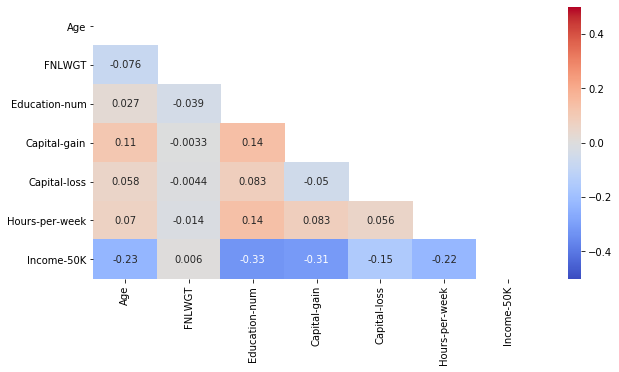

In [47]:
corr = df1.corr()

fig = plt.subplots(figsize = (10,5))


sns.heatmap(
    corr, 
    vmin=-.5, vmax=.5,
    # center=0,
    cmap='coolwarm',
    annot=True,
   mask = np.triu(np.ones_like(corr, dtype=np.bool))
 
   
)
ax.set_xticklabels((),
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
);

# Matrix is not showing any strong positive numeric correlations to the income over $50K column. 

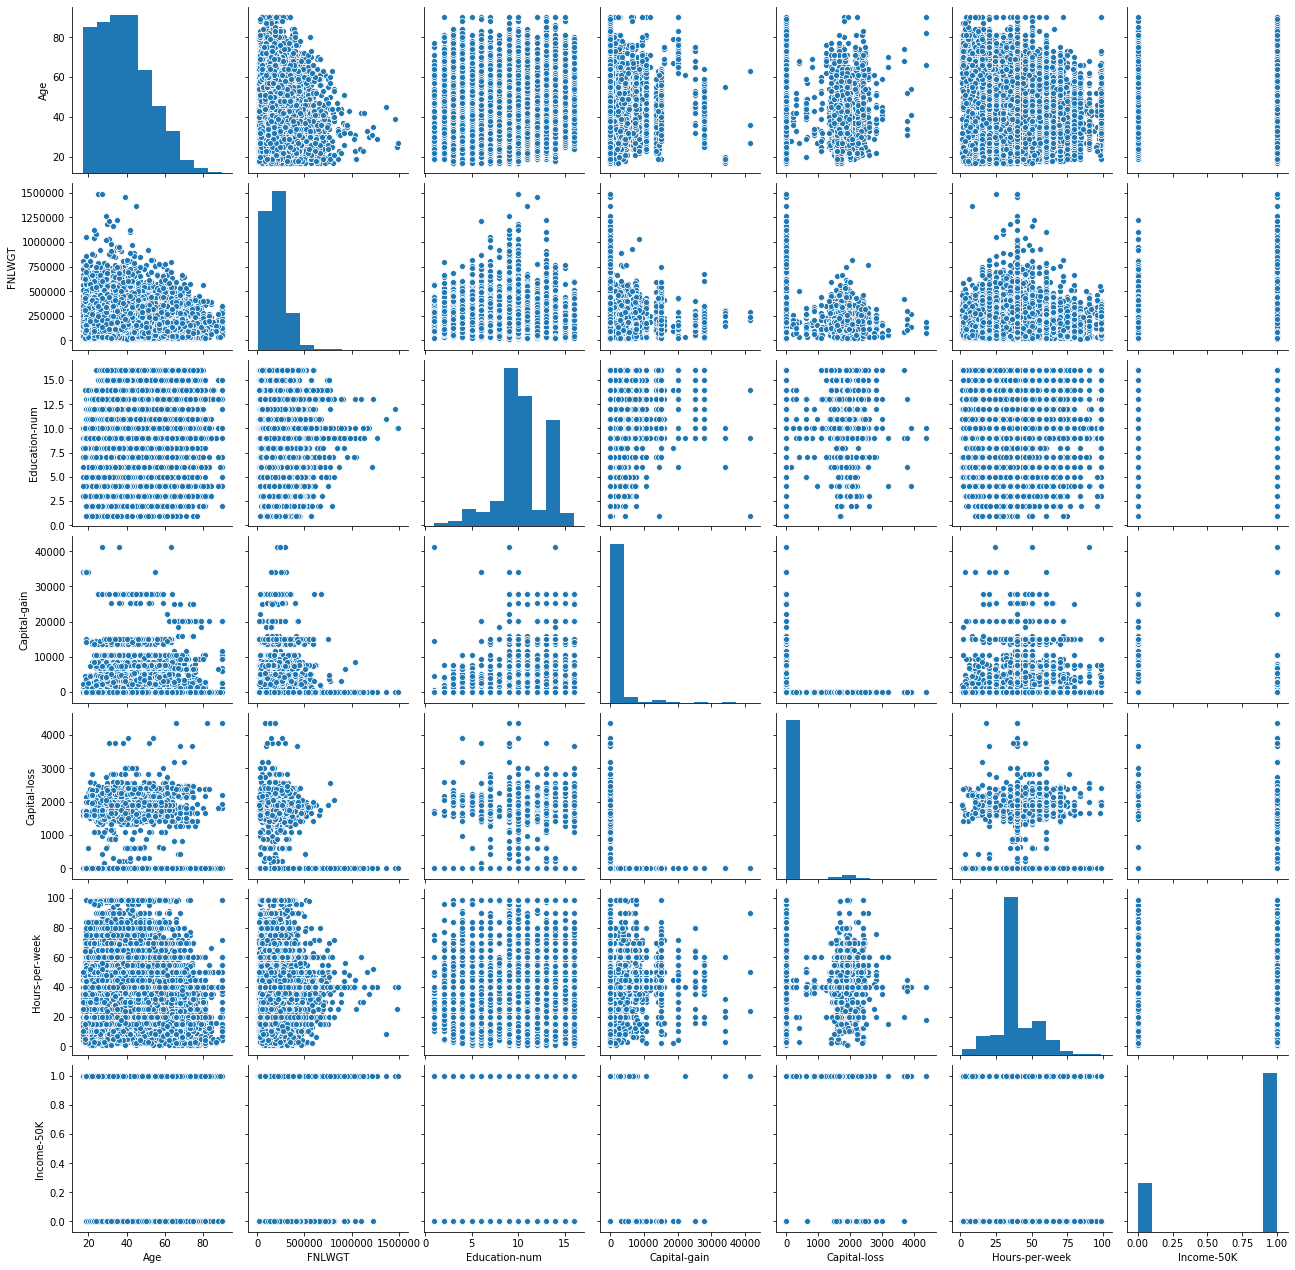

In [48]:
# Here is another scatter matrix of the different integer columns. 

sns.pairplot(df1, kind="scatter")
plt.show()

In [49]:
# I will begin the KNN model below. 

In [50]:
df1.head()

,Age,Work-class,FNLWGT,Education,Education-num,Marital,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income-50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1


In [51]:
# Defining the X and Y variables below. 

X = pd.get_dummies(df1.loc[:,df1.columns != 'Income-50K'], drop_first=True)
X.head()

,Age,FNLWGT,Education-num,Capital-gain,Capital-loss,Hours-per-week,Work-class_ Local-gov,Work-class_ Never-worked,Work-class_ Private,Work-class_ Self-emp-inc,Work-class_ Self-emp-not-inc,Work-class_ State-gov,Work-class_ Without-pay,Work-class_Unemployed,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital_ Married-AF-spouse,Marital_ Married-civ-spouse,Marital_ Married-spouse-absent,Marital_ Never-married,Marital_ Separated,Marital_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Occupation_Unemployed,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Male,Native-country_ Canada,Native-country_ China,Native-country_ Columbia,Native-country_ Cuba,Native-country_ Dominican-Republic,Native-country_ Ecuador,Native-country_ El-Salvador,Native-country_ England,Native-country_ France,Native-country_ Germany,Native-country_ Greece,Native-country_ Guatemala,Native-country_ Haiti,Native-country_ Holand-Netherlands,Native-country_ Honduras,Native-country_ Hong,Native-country_ Hungary,Native-country_ India,Native-country_ Iran,Native-country_ Ireland,Native-country_ Italy,Native-country_ Jamaica,Native-country_ Japan,Native-country_ Laos,Native-country_ Mexico,Native-country_ Nicaragua,Native-country_ Outlying-US(Guam-USVI-etc),Native-country_ Peru,Native-country_ Philippines,Native-country_ Poland,Native-country_ Portugal,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia
0,50,83311,13,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [52]:
y = df1.loc[:,'Income-50K']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Income-50K, dtype: int64

In [53]:
# Splitting the test and training data. 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [54]:
# Scaling the features here because of the type of classification model, to work I want to normalize it first. 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
# Lastly, below I will import the KNN classifier.

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [56]:
y_pred = classifier.predict(X_test)

In [57]:
# Below is a confusion matrix with the results showing the precision, recall, f1 score and support. 

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1352  932]
 [ 680 6745]]
              precision    recall  f1-score   support

           0       0.67      0.59      0.63      2284
           1       0.88      0.91      0.89      7425

    accuracy                           0.83      9709
   macro avg       0.77      0.75      0.76      9709
weighted avg       0.83      0.83      0.83      9709



Minimum error:- 0.1569677618704295 at K = 23


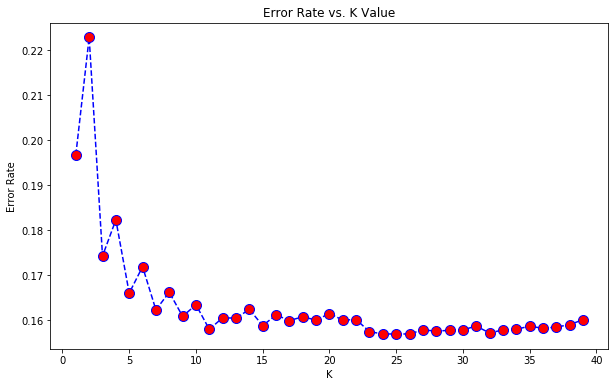

In [58]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))